# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import pickle

We import the data from the pickle file as JSON:

In [2]:
data_json = pd.read_pickle('summoner_stats.pkl')

## Dataframes generation

We will generate two raw dataframe: one of them will contain the preffered champion statdistics and the other one the stadistics for all champions.

In [3]:
def build_dataframes(json):
    pref_list = []
    total_list = []
    for index in json:
        pref_dict = json[index]['pref_champ']['stats']
        pref_dict['summID'] = index
        pref_dict['champID'] = json[index]['pref_champ']['id']
        pref_list.append(pref_dict)
        total_dict = json[index]['total']['stats']
        total_dict['summID'] = index
        total_list.append(total_dict)
    df_pc = pd.DataFrame(pref_list).set_index('summID')
    df_total = pd.DataFrame(total_list).set_index('summID')
    return df_pc, df_total

In [4]:
df_pc, df_total = build_dataframes(data_json)

In [5]:
def put_elos(json, df):
    list_league, list_division = [], []
    for index in df.index:
        values = json[index]
        if values == '':
            league, division = [np.nan]*2
        else:
            league, division = values.split('_')
        list_league.append(league)
        list_division.append(division)
    
    df['league'] = list_league
    df['division'] = list_division
            
    return df

data_json = pd.read_pickle('summoner_elos.pkl')
df_pc = put_elos( data_json, df_pc)
df_total = put_elos( data_json, df_total)

In [6]:
data_json = pd.read_pickle('champion_tags.pkl')
def rol_of_champ(json, df):
    
    dict_champ = {}
    for i in data_json['data']:
        dict_champ[data_json['data'][i]['id']] =data_json['data'][i]['tags']
    
    list_1st_rol, list_2n_rol = [], []
    for index in df.index:
        values = dict_champ[df.loc[index]['champID']]
        if len(values) == 1:
            rol_1st, rol_2nd = values*2
        else:
            rol_1st, rol_2nd  = values
        list_1st_rol.append(rol_1st)
        list_2n_rol.append(rol_2nd)
    
    df['champ1R'] = list_1st_rol
    df['champ2R'] = list_1st_rol
            
    return df
df_pc = rol_of_champ( data_json, df_pc)

In [7]:
df_pc = df_pc.dropna(axis=0, subset = ['league'])
df_total = df_total.dropna(axis = 0, subset = ['league'])

df_pc.league.value_counts()

platinum    8157
gold        4604
diamond     4601
silver      1376
bronze       470
master        27
Name: league, dtype: int64

In [8]:
from sklearn import preprocessing
encoLeague, encoDiv = preprocessing.LabelEncoder(), preprocessing.LabelEncoder()
encoLeague.fit(['bronze', 'silver', 'gold', 'platinum', 'diamond', 'master'])
print('League Encoder Classes: ', encoLeague.classes_,
     '\nCodification of Classes: ',   encoLeague.transform( encoLeague.classes_))
encoDiv.fit(['1', '2', '3', '4', '5'])
print('Division Encoder Classes: ', encoDiv.classes_,
     '\nCodification of Classes: ',   encoDiv.transform( encoDiv.classes_))

df_pc['league'] = encoLeague.transform(df_pc['league'])
df_total['league'] = encoLeague.transform(df_total['league'])

df_pc['division'] = encoDiv.transform(df_pc['division'])
df_total['division'] = encoDiv.transform(df_total['division'])


League Encoder Classes:  ['bronze' 'diamond' 'gold' 'master' 'platinum' 'silver'] 
Codification of Classes:  [0 1 2 3 4 5]
Division Encoder Classes:  ['1' '2' '3' '4' '5'] 
Codification of Classes:  [0 1 2 3 4]


In [9]:
encoTags = preprocessing.LabelEncoder()
encoTags.fit(df_pc['champ1R'].unique())
print('League Encoder Classes: ', encoTags.classes_, 
      '\nCodification of Classes: ',   encoTags.transform( encoTags.classes_))
df_pc['champ1R'] = encoTags.transform(df_pc['champ1R'])
df_pc['champ2R'] = encoTags.transform(df_pc['champ2R'])


League Encoder Classes:  ['Assassin' 'Fighter' 'Mage' 'Marksman' 'Support' 'Tank'] 
Codification of Classes:  [0 1 2 3 4 5]


We inspect the columns for the 'Preferred champion" dataframe. We also set the "Summoner ID" as the index. 

In [10]:
print(df_pc.columns)
df_pc.head()

Index(['champID', 'maxChampionsKilled', 'maxNumDeaths',
       'mostChampionKillsPerSession', 'mostSpellsCast', 'totalAssists',
       'totalChampionKills', 'totalDamageDealt', 'totalDamageTaken',
       'totalDeathsPerSession', 'totalDoubleKills', 'totalFirstBlood',
       'totalGoldEarned', 'totalMagicDamageDealt', 'totalMinionKills',
       'totalPentaKills', 'totalPhysicalDamageDealt', 'totalQuadraKills',
       'totalSessionsLost', 'totalSessionsPlayed', 'totalSessionsWon',
       'totalTripleKills', 'totalTurretsKilled', 'totalUnrealKills', 'league',
       'division', 'champ1R', 'champ2R'],
      dtype='object')


champID  maxChampionsKilled  maxNumDeaths  \
summID                                                
19903291       50                  15            12   
44072154      112                  19            13   
54318242       80                  25            18   
56127024       11                  25            12   
21996204      429                  25            18   

          mostChampionKillsPerSession  mostSpellsCast  totalAssists  \
summID                                                                
19903291                           15               0           493   
44072154                           19               0           924   
54318242                           25               0           484   
56127024                           25               0           278   
21996204                           25               0           327   

          totalChampionKills  totalDamageDealt  totalDamageTaken  \
summID                                                             
19903291                 318           5802903           1646268   
44072154                 943          22263379           1966583   
54318242                 861           9405931           1652717   
56127024                 510           8047846           1180614   
21996204                 367           5889726            829022   

          totalDeathsPerSession   ...     totalSessionsLost  \
summID                            ...                         
19903291                    308   ...                    18   
44072154                    585   ...                    46   
54318242                    497   ...                    29   
56127024                    310   ...                    17   
21996204                    279   ...                    23   

          totalSessionsPlayed  totalSessionsWon  totalTripleKills  \
summID                                                              
19903291                   53                35                 3   
44072154                  113                67                11   
54318242                   73                44                 8   
56127024                   47                30                31   
21996204                   45                22                 9   

          totalTurretsKilled  totalUnrealKills  league  division  champ1R  \
summID                                                                      
19903291                  68                 0       2         2        2   
44072154                 109                 0       1         4        2   
54318242                  94                 0       2         1        1   
56127024                  66                 0       4         4        0   
21996204                  68                 0       2         0        3   

          champ2R  
summID             
19903291        2  
44072154        2  
54318242        1  
56127024        0  
21996204        3  

[5 rows x 28 columns]

We reorder the columns and drop some of them like the 0 value stats (deprecated data from the Riot API) and unrelevant data ('unreal kills', 'games against IA', etc..)

In [11]:
df_pc = df_pc[['champID', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 
               'totalMinionKills', 'totalTurretsKilled', 'totalPhysicalDamageDealt', 'totalMagicDamageDealt', 
               'totalDamageTaken', 'totalDeathsPerSession', 'maxNumDeaths', 'totalAssists', 'totalChampionKills', 'totalDoubleKills', 
               'totalTripleKills', 'totalQuadraKills', 'totalPentaKills', 'mostChampionKillsPerSession', 'league', 'champ1R', 'champ2R']]
print(df_pc.dtypes)
df_pc.head()

champID                        int64
totalSessionsPlayed            int64
totalSessionsWon               int64
totalSessionsLost              int64
totalGoldEarned                int64
totalMinionKills               int64
totalTurretsKilled             int64
totalPhysicalDamageDealt       int64
totalMagicDamageDealt          int64
totalDamageTaken               int64
totalDeathsPerSession          int64
maxNumDeaths                   int64
totalAssists                   int64
totalChampionKills             int64
totalDoubleKills               int64
totalTripleKills               int64
totalQuadraKills               int64
totalPentaKills                int64
mostChampionKillsPerSession    int64
league                         int64
champ1R                        int64
champ2R                        int64
dtype: object


champID  totalSessionsPlayed  totalSessionsWon  totalSessionsLost  \
summID                                                                        
19903291       50                   53                35                 18   
44072154      112                  113                67                 46   
54318242       80                   73                44                 29   
56127024       11                   47                30                 17   
21996204      429                   45                22                 23   

          totalGoldEarned  totalMinionKills  totalTurretsKilled  \
summID                                                            
19903291           600429              8063                  68   
44072154          1564333             25712                 109   
54318242           946233              9991                  94   
56127024           629934              8767                  66   
21996204           554104              8045                  68   

          totalPhysicalDamageDealt  totalMagicDamageDealt  totalDamageTaken  \
summID                                                                        
19903291                   1402500                4374554           1646268   
44072154                   1621741               20556489           1966583   
54318242                   8405499                 891891           1652717   
56127024                   7266536                 499958           1180614   
21996204                   5711482                 119352            829022   

           ...     totalAssists  totalChampionKills  totalDoubleKills  \
summID     ...                                                          
19903291   ...              493                 318                21   
44072154   ...              924                 943                96   
54318242   ...              484                 861                95   
56127024   ...              278                 510                90   
21996204   ...              327                 367                42   

          totalTripleKills  totalQuadraKills  totalPentaKills  \
summID                                                          
19903291                 3                 0                0   
44072154                11                 2                0   
54318242                 8                 2                0   
56127024                31                 5                2   
21996204                 9                 0                0   

          mostChampionKillsPerSession  league  champ1R  champ2R  
summID                                                           
19903291                           15       2        2        2  
44072154                           19       1        2        2  
54318242                           25       2        1        1  
56127024                           25       4        0        0  
21996204                           25       2        3        3  

[5 rows x 22 columns]

In [12]:
print(df_pc.columns)
df_pc.head()

Index(['champID', 'totalSessionsPlayed', 'totalSessionsWon',
       'totalSessionsLost', 'totalGoldEarned', 'totalMinionKills',
       'totalTurretsKilled', 'totalPhysicalDamageDealt',
       'totalMagicDamageDealt', 'totalDamageTaken', 'totalDeathsPerSession',
       'maxNumDeaths', 'totalAssists', 'totalChampionKills',
       'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills',
       'totalPentaKills', 'mostChampionKillsPerSession', 'league', 'champ1R',
       'champ2R'],
      dtype='object')


champID  totalSessionsPlayed  totalSessionsWon  totalSessionsLost  \
summID                                                                        
19903291       50                   53                35                 18   
44072154      112                  113                67                 46   
54318242       80                   73                44                 29   
56127024       11                   47                30                 17   
21996204      429                   45                22                 23   

          totalGoldEarned  totalMinionKills  totalTurretsKilled  \
summID                                                            
19903291           600429              8063                  68   
44072154          1564333             25712                 109   
54318242           946233              9991                  94   
56127024           629934              8767                  66   
21996204           554104              8045                  68   

          totalPhysicalDamageDealt  totalMagicDamageDealt  totalDamageTaken  \
summID                                                                        
19903291                   1402500                4374554           1646268   
44072154                   1621741               20556489           1966583   
54318242                   8405499                 891891           1652717   
56127024                   7266536                 499958           1180614   
21996204                   5711482                 119352            829022   

           ...     totalAssists  totalChampionKills  totalDoubleKills  \
summID     ...                                                          
19903291   ...              493                 318                21   
44072154   ...              924                 943                96   
54318242   ...              484                 861                95   
56127024   ...              278                 510                90   
21996204   ...              327                 367                42   

          totalTripleKills  totalQuadraKills  totalPentaKills  \
summID                                                          
19903291                 3                 0                0   
44072154                11                 2                0   
54318242                 8                 2                0   
56127024                31                 5                2   
21996204                 9                 0                0   

          mostChampionKillsPerSession  league  champ1R  champ2R  
summID                                                           
19903291                           15       2        2        2  
44072154                           19       1        2        2  
54318242                           25       2        1        1  
56127024                           25       4        0        0  
21996204                           25       2        3        3  

[5 rows x 22 columns]

Now we perform the same actions for the 'All champions' dataframe.

In [13]:
df_total = df_total[['totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 
               'totalMinionKills', 'totalNeutralMinionsKilled', 'totalTurretsKilled', 'totalPhysicalDamageDealt', 
                'totalMagicDamageDealt', 'totalDamageTaken', 'totalHeal', 'totalDeathsPerSession', 'totalAssists', 
                'totalChampionKills', 'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills', 'totalPentaKills',
                    'league']]
print(df_total.dtypes)
df_total.head()

totalSessionsPlayed          int64
totalSessionsWon             int64
totalSessionsLost            int64
totalGoldEarned              int64
totalMinionKills             int64
totalNeutralMinionsKilled    int64
totalTurretsKilled           int64
totalPhysicalDamageDealt     int64
totalMagicDamageDealt        int64
totalDamageTaken             int64
totalHeal                    int64
totalDeathsPerSession        int64
totalAssists                 int64
totalChampionKills           int64
totalDoubleKills             int64
totalTripleKills             int64
totalQuadraKills             int64
totalPentaKills              int64
league                       int64
dtype: object


totalSessionsPlayed  totalSessionsWon  totalSessionsLost  \
summID                                                               
19903291                  378               188                190   
44072154                 1123               564                559   
54318242                  214               121                 93   
56127024                  393               208                185   
21996204                  736               364                372   

          totalGoldEarned  totalMinionKills  totalNeutralMinionsKilled  \
summID                                                                   
19903291          4503112             60169                       4369   
44072154         13546812            165259                      23569   
54318242          2557794             30056                       2012   
56127024          4764237             60909                       7024   
21996204          9124827            122313                       7085   

          totalTurretsKilled  totalPhysicalDamageDealt  totalMagicDamageDealt  \
summID                                                                          
19903291                 389                  21870541               27577463   
44072154                1054                  70496980               83285732   
54318242                 250                  17675981                8349181   
56127024                 406                  38009390               14653421   
21996204                 722                  60418363               37793463   

          totalDamageTaken  totalHeal  totalDeathsPerSession  totalAssists  \
summID                                                                       
19903291          10009111    2686420                   2769          3604   
44072154          26878396    4911950                   6391         10538   
54318242           5411793    1177452                   1360          1716   
56127024           9416886    1011635                   2443          3080   
21996204          17049001    2260677                   4971          6457   

          totalChampionKills  totalDoubleKills  totalTripleKills  \
summID                                                             
19903291                2180               181                19   
44072154                7065               661                97   
54318242                1740               164                14   
56127024                2935               349                74   
21996204                5018               495                64   

          totalQuadraKills  totalPentaKills  league  
summID                                               
19903291                 2                0       2  
44072154                14                4       1  
54318242                 3                0       2  
56127024                14                3       4  
21996204                 8                1       2

## Data filtering and standarization by sessions played

We only consider the accounts that have 50 or more games played. 

In [14]:
df_pc = df_pc[df_pc.totalSessionsPlayed >= 50]
df_total = df_total[df_total.totalSessionsPlayed >= 50]

The "total" stadisitics are calculated as the sum of the totalSessionsPlayed so we must calculate the average data for all games.

In [15]:
df_pc['GoldEarned'] = df_pc['totalGoldEarned'] / df_pc['totalSessionsPlayed']
df_pc['MinionKills'] = df_pc['totalMinionKills'] / df_pc['totalSessionsPlayed']             
df_pc['PhysicalDamageDealt'] = df_pc['totalPhysicalDamageDealt'] / df_pc['totalSessionsPlayed']     
df_pc['MagicDamageDealt'] = df_pc['totalMagicDamageDealt'] / df_pc['totalSessionsPlayed']  
df_pc['DamageTaken'] = df_pc['totalDamageTaken'] / df_pc['totalSessionsPlayed']              
df_pc['DoubleKills'] = df_pc['totalDoubleKills'] / df_pc['totalSessionsPlayed']
df_pc['TripleKills'] = df_pc['totalTripleKills'] / df_pc['totalSessionsPlayed']
df_pc['QuadraKills'] = df_pc['totalQuadraKills'] / df_pc['totalSessionsPlayed']
df_pc['PentaKills'] = df_pc['totalPentaKills'] / df_pc['totalSessionsPlayed']
df_pc['TurretsKilled'] = df_pc['totalTurretsKilled'] / df_pc['totalSessionsPlayed']

df_total['GoldEarned'] = df_total['totalGoldEarned'] / df_total['totalSessionsPlayed']
df_total['MinionKills'] = df_total['totalMinionKills'] / df_total['totalSessionsPlayed']             
df_total['PhysicalDamageDealt'] = df_total['totalPhysicalDamageDealt'] / df_total['totalSessionsPlayed']     
df_total['MagicDamageDealt'] = df_total['totalMagicDamageDealt'] / df_total['totalSessionsPlayed']
df_total['DamageTaken'] = df_total['totalDamageTaken'] / df_total['totalSessionsPlayed']
df_total['DoubleKills'] = df_total['totalDoubleKills'] / df_total['totalSessionsPlayed']
df_total['TripleKills'] = df_total['totalTripleKills'] / df_total['totalSessionsPlayed']
df_total['QuadraKills'] = df_total['totalQuadraKills'] / df_total['totalSessionsPlayed']
df_total['PentaKills'] = df_total['totalPentaKills'] / df_total['totalSessionsPlayed']
df_total['TurretsKilled'] = df_total['totalTurretsKilled'] / df_total['totalSessionsPlayed']
df_total['Heal'] = df_total['totalHeal'] / df_total['totalSessionsPlayed']
df_total['NeutralMinionsKilled	'] = df_total['totalNeutralMinionsKilled'] / df_total['totalSessionsPlayed']

### KDA calculation

One important metric in competitive games as League of Legends is the KDA (Kills-Deaths-Assists) ratio. For a given player when can calculate the KDA for the ranked Season 5 as 
\begin{equation}
KDA = \frac{totalChampionKills + totalAssists}{totalDeathsPerSession} 
\end{equation}

In [16]:
df_pc['KDA'] = (df_pc['totalChampionKills'] + df_pc['totalAssists']) / df_pc['totalDeathsPerSession']

In [17]:
df_pc[['KDA', 'totalChampionKills', 'totalAssists', 'totalDeathsPerSession']].head()

KDA  totalChampionKills  totalAssists  totalDeathsPerSession
summID                                                                     
19903291  2.633117                 318           493                    308
44072154  3.191453                 943           924                    585
54318242  2.706237                 861           484                    497
25251018  2.401396                 491           885                    573
54027173  2.789668                1330           938                    813

In [18]:
df_total['totalKDA'] = (df_total['totalChampionKills'] + df_total['totalAssists']) / df_total['totalDeathsPerSession']

In [19]:
df_total[['totalKDA', 'totalChampionKills', 'totalAssists', 'totalDeathsPerSession']].head()

totalKDA  totalChampionKills  totalAssists  totalDeathsPerSession
summID                                                                     
19903291  2.088841                2180          3604                   2769
44072154  2.754342                7065         10538                   6391
54318242  2.541176                1740          1716                   1360
56127024  2.462137                2935          3080                   2443
21996204  2.308389                5018          6457                   4971

### Win rate calculation

We calculate the Win Rate percentage per player for both dataframes (it will be the same as they are the same players).

In [20]:
df_pc['WinRate'] = df_pc['totalSessionsWon'] / df_pc['totalSessionsPlayed']

In [21]:
df_pc[['WinRate', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost']].head()

WinRate  totalSessionsPlayed  totalSessionsWon  totalSessionsLost
summID                                                                      
19903291  0.660377                   53                35                 18
44072154  0.592920                  113                67                 46
54318242  0.602740                   73                44                 29
25251018  0.466667                   75                35                 40
54027173  0.564286                  140                79                 61

In [22]:
df_total['WinRate'] = df_pc['totalSessionsWon'] / df_pc['totalSessionsPlayed']

In [23]:
df_total[['WinRate', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost']].head()

WinRate  totalSessionsPlayed  totalSessionsWon  totalSessionsLost
summID                                                                      
19903291  0.660377                  378               188                190
44072154  0.592920                 1123               564                559
54318242  0.602740                  214               121                 93
56127024       NaN                  393               208                185
21996204       NaN                  736               364                372

### Drop the unnecessary data

In [24]:
df_pc.drop(df_pc[['totalChampionKills', 'totalTurretsKilled', 'totalAssists', 'totalDeathsPerSession', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 'totalMinionKills', 'totalPhysicalDamageDealt', 'totalMagicDamageDealt','totalDamageTaken', 'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills', 'totalPentaKills']], axis=1, inplace=True)

In [25]:
df_total.drop(df_total[['totalHeal' ,'totalNeutralMinionsKilled','totalChampionKills', 'totalTurretsKilled', 'totalAssists', 'totalDeathsPerSession', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 'totalMinionKills', 'totalPhysicalDamageDealt', 'totalMagicDamageDealt','totalDamageTaken', 'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills', 'totalPentaKills']], axis=1, inplace=True)

## Dataframe description 

In [26]:
df_pc.head()

champID  maxNumDeaths  mostChampionKillsPerSession  league  champ1R  \
summID                                                                          
19903291       50            12                           15       2        2   
44072154      112            13                           19       1        2   
54318242       80            18                           25       2        1   
25251018       64            16                           20       4        1   
54027173      238            14                           21       2        0   

          champ2R    GoldEarned  MinionKills  PhysicalDamageDealt  \
summID                                                              
19903291        2  11328.849057   152.132075         26462.264151   
44072154        2  13843.654867   227.539823         14351.690265   
54318242        1  12962.095890   136.863014        115143.821918   
25251018        1  12247.226667    43.493333         84260.320000   
54027173        0  12994.957143   187.028571        142879.500000   

          MagicDamageDealt   DamageTaken  DoubleKills  TripleKills  \
summID                                                               
19903291      82538.754717  31061.660377     0.396226     0.056604   
44072154     181915.831858  17403.389381     0.849558     0.097345   
54318242      12217.684932  22639.958904     1.301370     0.109589   
25251018      31008.986667  35540.360000     0.440000     0.013333   
54027173       6623.042857  23623.885714     0.764286     0.107143   

          QuadraKills  PentaKills  TurretsKilled       KDA   WinRate  
summID                                                                
19903291     0.000000         0.0       1.283019  2.633117  0.660377  
44072154     0.017699         0.0       0.964602  3.191453  0.592920  
54318242     0.027397         0.0       1.287671  2.706237  0.602740  
25251018     0.000000         0.0       0.333333  2.401396  0.466667  
54027173     0.000000         0.0       0.721429  2.789668  0.564286

In [27]:
df_total.head()

league    GoldEarned  MinionKills  PhysicalDamageDealt  \
summID                                                             
19903291       2  11912.994709   159.177249         57858.574074   
44072154       1  12063.056100   147.158504         62775.583259   
54318242       2  11952.308411   140.448598         82598.042056   
56127024       4  12122.740458   154.984733         96716.005089   
21996204       2  12397.862772   166.186141         82090.167120   

          MagicDamageDealt   DamageTaken  DoubleKills  TripleKills  \
summID                                                               
19903291      72956.251323  26479.129630     0.478836     0.050265   
44072154      74163.608192  23934.457703     0.588602     0.086376   
54318242      39014.864486  25288.752336     0.766355     0.065421   
56127024      37286.058524  23961.541985     0.888041     0.188295   
21996204      51349.813859  23164.403533     0.672554     0.086957   

          QuadraKills  PentaKills  TurretsKilled         Heal  \
summID                                                          
19903291     0.005291    0.000000       1.029101  7106.931217   
44072154     0.012467    0.003562       0.938557  4373.953695   
54318242     0.014019    0.000000       1.168224  5502.112150   
56127024     0.035623    0.007634       1.033079  2574.134860   
21996204     0.010870    0.001359       0.980978  3071.572011   

          NeutralMinionsKilled\t  totalKDA   WinRate  
summID                                                
19903291               11.558201  2.088841  0.660377  
44072154               20.987533  2.754342  0.592920  
54318242                9.401869  2.541176  0.602740  
56127024               17.872774  2.462137       NaN  
21996204                9.626359  2.308389       NaN

### Mean, std, min, max and percentiles

In [28]:
df_pc.describe()

champID  maxNumDeaths  mostChampionKillsPerSession        league  \
count  13550.000000  13550.000000                 13550.000000  13550.000000   
mean     129.856384     14.077122                    19.817860      2.748487   
std      118.390212      2.618882                     7.378841      1.438657   
min        1.000000      6.000000                     2.000000      0.000000   
25%       55.000000     12.000000                    16.000000      1.000000   
50%       90.000000     14.000000                    21.000000      4.000000   
75%      157.000000     16.000000                    25.000000      4.000000   
max      432.000000     37.000000                    54.000000      5.000000   

            champ1R       champ2R    GoldEarned   MinionKills  \
count  13550.000000  13550.000000  13550.000000  13550.000000   
mean       2.255203      2.255203  12212.636387    134.334126   
std        1.508103      1.508103   1593.731657     74.756716   
min        0.000000      0.000000   7312.767123      4.178571   
25%        1.000000      1.000000  11477.238383     50.856346   
50%        2.000000      2.000000  12608.660317    166.298692   
75%        3.000000      3.000000  13324.544627    199.261848   
max        5.000000      5.000000  17377.960784    272.441176   

       PhysicalDamageDealt  MagicDamageDealt   DamageTaken   DoubleKills  \
count         13550.000000      13550.000000  13550.000000  13550.000000   
mean          85175.497898      42217.726866  24464.986951      0.746201   
std           66950.118745      46943.865823   5643.265365      0.478554   
min            1669.872814         32.338235   7345.445525      0.000000   
25%           14882.809664       8639.013763  20351.690511      0.388456   
50%           91009.029349      20303.598138  23653.957353      0.766931   
75%          145374.039807      63859.751393  28040.998517      1.077967   
max          267872.785714     230219.826923  52609.887500      3.112903   

        TripleKills   QuadraKills    PentaKills  TurretsKilled           KDA  \
count  13550.000000  13550.000000  13550.000000   13550.000000  13550.000000   
mean       0.115665      0.017785      0.003163       1.056519      2.948795   
std        0.108480      0.024911      0.007231       0.630363      0.754146   
min        0.000000      0.000000      0.000000       0.018519      0.969806   
25%        0.026918      0.000000      0.000000       0.512195      2.444970   
50%        0.095238      0.009654      0.000000       0.979084      2.835881   
75%        0.174603      0.026619      0.001774       1.514494      3.309295   
max        0.961039      0.266881      0.135593       3.586207      9.892157   

            WinRate  
count  13550.000000  
mean       0.560401  
std        0.059990  
min        0.096491  
25%        0.522388  
50%        0.560731  
75%        0.597403  
max        0.860000

In [29]:
df_total.describe()

/Users/juanluismoralperez/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


league    GoldEarned   MinionKills  PhysicalDamageDealt  \
count  19235.000000  19235.000000  19235.000000         19235.000000   
mean       2.776085  11906.865305    131.281016         75996.084143   
std        1.440920    831.825566     34.755858         27348.403472   
min        0.000000   7953.090090     10.779956          3548.289760   
25%        1.000000  11458.398113    109.161373         58252.421002   
50%        2.000000  11992.792633    134.816667         76226.251599   
75%        4.000000  12450.212873    156.105975         93549.963519   
max        5.000000  16127.776423    239.860963        252527.516556   

       MagicDamageDealt   DamageTaken   DoubleKills   TripleKills  \
count      19235.000000  19235.000000  19235.000000  19235.000000   
mean       48493.730015  25134.666053      0.626636      0.089555   
std        17687.029839   2993.937000      0.243009      0.051633   
min          438.508130  11588.130300      0.008715      0.000000   
25%        36315.655694  23167.437019      0.467175      0.054003   
50%        46775.587413  25121.626220      0.620523      0.082335   
75%        58355.169131  27085.394681      0.775909      0.117038   
max       149002.325000  40111.350993      2.569106      0.658537   

        QuadraKills    PentaKills  TurretsKilled          Heal  \
count  19235.000000  19235.000000   19235.000000  19235.000000   
mean       0.012615      0.002096       0.943920   4022.698832   
std        0.010963      0.003108       0.288106   1271.908756   
min        0.000000      0.000000       0.095890    827.818898   
25%        0.005136      0.000000       0.755596   3221.605698   
50%        0.010363      0.001112       0.933622   3819.839879   
75%        0.017391      0.003155       1.117294   4568.554042   
max        0.178862      0.071429       2.707692  26442.601307   

       NeutralMinionsKilled\t      totalKDA       WinRate  
count            19235.000000  19235.000000  13550.000000  
mean                20.272242      2.643273      0.560401  
std                 10.437303      0.467400      0.059990  
min                  0.132653      1.171344      0.096491  
25%                 13.132965      2.327130           NaN  
50%                 18.555556      2.587140           NaN  
75%                 25.284555      2.895108           NaN  
max                 82.748521      7.159737      0.860000

### Covariances and Correlation between features

In [30]:
df_pc.cov()

champID  maxNumDeaths  \
champID                      1.401624e+04    -11.646167   
maxNumDeaths                -1.164617e+01      6.858544   
mostChampionKillsPerSession -2.812207e+02      6.472532   
league                       9.722899e-01      0.074384   
champ1R                      4.497362e+01     -0.787415   
champ2R                      4.497362e+01     -0.787415   
GoldEarned                  -6.551260e+04    741.953355   
MinionKills                 -2.079186e+03     15.576408   
PhysicalDamageDealt         -6.816850e+05  23916.970150   
MagicDamageDealt            -1.359271e+06  -1585.953958   
DamageTaken                 -6.808411e+04   2719.026954   
DoubleKills                 -1.339256e+01      0.316706   
TripleKills                 -1.982270e+00      0.059301   
QuadraKills                 -2.437205e-01      0.010334   
PentaKills                  -3.556007e-02      0.001978   
TurretsKilled               -1.184360e+01      0.177434   
KDA                          6.280621e+00     -1.201069   
WinRate                     -8.292598e-01     -0.018720   

                             mostChampionKillsPerSession      league  \
champID                                      -281.220713    0.972290   
maxNumDeaths                                    6.472532    0.074384   
mostChampionKillsPerSession                    54.447301   -0.050907   
league                                         -0.050907    2.069735   
champ1R                                        -6.022227    0.069284   
champ2R                                        -6.022227    0.069284   
GoldEarned                                   9469.812241   21.963132   
MinionKills                                   340.794174   -1.563786   
PhysicalDamageDealt                        267466.143101 -310.394513   
MagicDamageDealt                            40409.072070 -887.700912   
DamageTaken                                  2252.131509  139.808173   
DoubleKills                                     2.912944    0.002421   
TripleKills                                     0.543669    0.000885   
QuadraKills                                     0.094069    0.000276   
PentaKills                                      0.018097    0.000044   
TurretsKilled                                   2.619104   -0.006330   
KDA                                            -1.893388   -0.025588   
WinRate                                         0.042211   -0.004018   

                                  champ1R       champ2R    GoldEarned  \
champID                         44.973624     44.973624 -6.551260e+04   
maxNumDeaths                    -0.787415     -0.787415  7.419534e+02   
mostChampionKillsPerSession     -6.022227     -6.022227  9.469812e+03   
league                           0.069284      0.069284  2.196313e+01   
champ1R                          2.274375      2.274375 -1.145729e+03   
champ2R                          2.274375      2.274375 -1.145729e+03   
GoldEarned                   -1145.729123  -1145.729123  2.539981e+06   
MinionKills                    -23.862356    -23.862356  8.992100e+04   
PhysicalDamageDealt         -29871.429487 -29871.429487  7.283488e+07   
MagicDamageDealt            -11030.825051 -11030.825051  1.044497e+07   
DamageTaken                  -2202.957464  -2202.957464  7.325625e+05   
DoubleKills                     -0.292615     -0.292615  6.283936e+02   
TripleKills                     -0.045773     -0.045773  1.172046e+02   
QuadraKills                     -0.006081     -0.006081  2.022390e+01   
PentaKills                      -0.000992     -0.000992  3.785356e+00   
TurretsKilled                   -0.168698     -0.168698  7.239417e+02   
KDA                              0.326748      0.326748 -3.078991e+02   
WinRate                         -0.002939     -0.002939  1.747543e+01   

                              MinionKills  PhysicalDamageDealt  \
champID                     -2.079186e+03        -6.816850e+05   
maxNumDeaths           

In [31]:
df_pc.corr()

champID  maxNumDeaths  \
champID                      1.000000     -0.037562   
maxNumDeaths                -0.037562      1.000000   
mostChampionKillsPerSession -0.321917      0.334942   
league                       0.005709      0.019743   
champ1R                      0.251890     -0.199369   
champ2R                      0.251890     -0.199369   
GoldEarned                  -0.347211      0.177765   
MinionKills                 -0.234924      0.079561   
PhysicalDamageDealt         -0.086004      0.136408   
MagicDamageDealt            -0.244575     -0.012900   
DamageTaken                 -0.101906      0.183979   
DoubleKills                 -0.236383      0.252703   
TripleKills                 -0.154346      0.208735   
QuadraKills                 -0.082639      0.158403   
PentaKills                  -0.041537      0.104472   
TurretsKilled               -0.158700      0.107481   
KDA                          0.070345     -0.608130   
WinRate                     -0.116760     -0.119154   

                             mostChampionKillsPerSession    league   champ1R  \
champID                                        -0.321917  0.005709  0.251890   
maxNumDeaths                                    0.334942  0.019743 -0.199369   
mostChampionKillsPerSession                     1.000000 -0.004795 -0.541175   
league                                         -0.004795  1.000000  0.031933   
champ1R                                        -0.541175  0.031933  1.000000   
champ2R                                        -0.541175  0.031933  1.000000   
GoldEarned                                      0.805263  0.009579 -0.476690   
MinionKills                                     0.617808 -0.014540 -0.211657   
PhysicalDamageDealt                             0.541414 -0.003223 -0.295851   
MagicDamageDealt                                0.116657 -0.013144 -0.155811   
DamageTaken                                     0.054085  0.017220 -0.258848   
DoubleKills                                     0.824922  0.003517 -0.405447   
TripleKills                                     0.679197  0.005673 -0.279787   
QuadraKills                                     0.511757  0.007700 -0.161873   
PentaKills                                      0.339153  0.004273 -0.090979   
TurretsKilled                                   0.563085 -0.006980 -0.177455   
KDA                                            -0.340248 -0.023584  0.287294   
WinRate                                         0.095359 -0.046553 -0.032483   

                              champ2R  GoldEarned  MinionKills  \
champID                      0.251890   -0.347211    -0.234924   
maxNumDeaths                -0.199369    0.177765     0.079561   
mostChampionKillsPerSession -0.541175    0.805263     0.617808   
league                       0.031933    0.009579    -0.014540   
champ1R                      1.000000   -0.476690    -0.211657   
champ2R                      1.000000   -0.476690    -0.211657   
GoldEarned                  -0.476690    1.000000     0.754737   
MinionKills                 -0.211657    0.754737     1.000000   
PhysicalDamageDealt         -0.295851    0.682610     0.577499   
MagicDamageDealt            -0.155811    0.139609     0.089028   
DamageTaken                 -0.258848    0.081451    -0.205908   
DoubleKills                 -0.405447    0.823921     0.680029   
TripleKills                 -0.279787    0.677920     0.592677   
QuadraKills                 -0.161873    0.509397     0.455550   
PentaKills                  -0.090979    0.328459     0.298491   
TurretsKilled               -0.177455    0.720605     0.781195   
KDA                          0.287294   -0.256176    -0.289384   
WinRate                     -0.032483    0.182781     0.099433   

                             PhysicalDamageDealt  MagicDamageDealt  \
champID                                -0.086004         -0.244575   
maxNumDeaths                            0.136408         -0.012900  

In [32]:
df_total.cov()

league    GoldEarned    MinionKills  \
league                    2.076250  2.629453e+01      -0.920936   
GoldEarned               26.294531  6.919338e+05   21871.114598   
MinionKills              -0.920936  2.187111e+04    1207.969683   
PhysicalDamageDealt       7.599373  1.680812e+07  619817.329617   
MagicDamageDealt       -368.680443  3.597987e+06  122313.160628   
DamageTaken             147.768077  4.944983e+05  -15799.075461   
DoubleKills               0.001417  1.652182e+02       5.500943   
TripleKills              -0.000010  3.091684e+01       1.067148   
QuadraKills              -0.000035  5.201418e+00       0.181254   
PentaKills               -0.000029  9.586987e-01       0.033111   
TurretsKilled            -0.003300  1.660198e+02       7.513303   
Heal                    -39.262162 -1.371129e+05  -11956.375193   
NeutralMinionsKilled\t   -0.284838  2.680826e+03     -70.421174   
totalKDA                 -0.009380 -5.583298e+01      -1.922474   
WinRate                  -0.004018  4.134267e+00       0.169048   

                        PhysicalDamageDealt  MagicDamageDealt   DamageTaken  \
league                         7.599373e+00     -3.686804e+02  1.477681e+02   
GoldEarned                     1.680812e+07      3.597987e+06  4.944983e+05   
MinionKills                    6.198173e+05      1.223132e+05 -1.579908e+04   
PhysicalDamageDealt            7.479352e+08     -1.819017e+08  9.790563e+06   
MagicDamageDealt              -1.819017e+08      3.128310e+08  4.744405e+06   
DamageTaken                    9.790563e+06      4.744405e+06  8.963659e+06   
DoubleKills                    4.567875e+03      1.761333e+02  2.861820e+01   
TripleKills                    8.946736e+02     -1.540167e+01 -3.957098e+00   
QuadraKills                    1.575747e+02     -1.090480e+01 -1.733647e+00   
PentaKills                     3.002764e+01     -3.535845e+00 -4.145483e-01   
TurretsKilled                  6.219896e+03     -6.182820e+02 -2.644852e+01   
Heal                          -7.887498e+06      3.498894e+06  1.494882e+06   
NeutralMinionsKilled\t         7.041706e+04      3.014208e+04  1.553934e+04   
totalKDA                      -2.433587e+03     -2.085530e+02 -6.772100e+02   
WinRate                        3.571566e+01      1.051910e+02 -2.130070e+00   

                        DoubleKills  TripleKills  QuadraKills  PentaKills  \
league                     0.001417    -0.000010    -0.000035   -0.000029   
GoldEarned               165.218178    30.916840     5.201418    0.958699   
MinionKills                5.500943     1.067148     0.181254    0.033111   
PhysicalDamageDealt     4567.874833   894.673590   157.574655   30.027637   
MagicDamageDealt         176.133275   -15.401667   -10.904803   -3.535845   
DamageTaken               28.618198    -3.957098    -1.733647   -0.414548   
DoubleKills                0.059053     0.011671     0.002058    0.000401   
TripleKills                0.011671     0.002666     0.000482    0.000096   
QuadraKills                0.002058     0.000482     0.000120    0.000023   
PentaKills                 0.000401     0.000096     0.000023    0.000010   
TurretsKilled              0.045540     0.008974     0.001569    0.000302   
Heal                     -84.363213   -17.002661    -3.039772   -0.579403   
NeutralMinionsKilled\t     0.371424     0.045953     0.005971    0.000878   
totalKDA                  -0.020975    -0.003070    -0.000409   -0.000059   
WinRate                    0.001567     0.000355     0.000062    0.000012   

                        TurretsKilled          Heal  NeutralMinionsKilled\t  \
league                      -0.003300 -3.926216e+01               -0.284838   
GoldEarned                 166.019777 -1.371129e+05             2680.825520   
MinionKills                  7.513303 -1.195638e+04              -70.421174   
PhysicalDamageDealt       6219.895909 -7.887498e+06            70417.058877   
MagicDamageDealt          -618.281956  3.498894e+06           

In [33]:
df_total.corr()

league  GoldEarned  MinionKills  \
league                  1.000000    0.021938    -0.018389   
GoldEarned              0.021938    1.000000     0.756503   
MinionKills            -0.018389    0.756503     1.000000   
PhysicalDamageDealt     0.000193    0.738848     0.652084   
MagicDamageDealt       -0.014466    0.244553     0.198971   
DamageTaken             0.034253    0.198559    -0.151831   
DoubleKills             0.004047    0.817341     0.651309   
TripleKills            -0.000129    0.719843     0.594664   
QuadraKills            -0.002234    0.570387     0.475708   
PentaKills             -0.006457    0.370811     0.306514   
TurretsKilled          -0.007950    0.692747     0.750327   
Heal                   -0.021423   -0.129596    -0.270468   
NeutralMinionsKilled\t -0.018940    0.308779    -0.194127   
totalKDA               -0.013927   -0.143605    -0.118343   
WinRate                -0.046553    0.082933     0.078302   

                        PhysicalDamageDealt  MagicDamageDealt  DamageTaken  \
league                             0.000193         -0.014466     0.034253   
GoldEarned                         0.738848          0.244553     0.198559   
MinionKills                        0.652084          0.198971    -0.151831   
PhysicalDamageDealt                1.000000         -0.376054     0.119573   
MagicDamageDealt                  -0.376054          1.000000     0.089595   
DamageTaken                        0.119573          0.089595     1.000000   
DoubleKills                        0.687322          0.040979     0.039335   
TripleKills                        0.633589         -0.016865    -0.025598   
QuadraKills                        0.525575         -0.056240    -0.052820   
PentaKills                         0.353258         -0.064319    -0.044549   
TurretsKilled                      0.789403         -0.121333    -0.030662   
Heal                              -0.226752          0.155532     0.392562   
NeutralMinionsKilled\t             0.246693          0.163279     0.497281   
totalKDA                          -0.190382         -0.025227    -0.483941   
WinRate                            0.020744          0.094787    -0.011638   

                        DoubleKills  TripleKills  QuadraKills  PentaKills  \
league                     0.004047    -0.000129    -0.002234   -0.006457   
GoldEarned                 0.817341     0.719843     0.570387    0.370811   
MinionKills                0.651309     0.594664     0.475708    0.306514   
PhysicalDamageDealt        0.687322     0.633589     0.525575    0.353258   
MagicDamageDealt           0.040979    -0.016865    -0.056240   -0.064319   
DamageTaken                0.039335    -0.025598    -0.052820   -0.044549   
DoubleKills                1.000000     0.930132     0.772457    0.530322   
TripleKills                0.930132     1.000000     0.851930    0.595706   
QuadraKills                0.772457     0.851930     1.000000    0.689231   
PentaKills                 0.530322     0.595706     0.689231    1.000000   
TurretsKilled              0.650455     0.603249     0.496754    0.337264   
Heal                      -0.272945    -0.258902    -0.218004   -0.146564   
NeutralMinionsKilled\t     0.146440     0.085271     0.052182    0.027063   
totalKDA                  -0.184671    -0.127220    -0.079905   -0.040519   
WinRate                    0.106455     0.115461     0.097890    0.075400   

                        TurretsKilled      Heal  NeutralMinionsKilled\t  \
league                      -0.007950 -0.021423               -0.018940   
GoldEarned                   0.692747 -0.129596                0.308779   
MinionKills                  0.750327 -0.270468               -0.194127   
PhysicalDamageDealt          0.789403 -0.226752                0.246693   
MagicDamageDealt            -0.121333  0.155532                0.163279   
DamageTaken                 -0.030662  0.392562                0.497281   
DoubleKills                  0.650455 -0.2

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('juanluismoralperez', 'MUMjWF4QwNy8AtZW6WUq')

trace1 = go.Scatter3d(
    x=df_pc.PhysicalDamageDealt,
    y=df_pc.KDA,
    z=df_pc.league,
    mode='markers',
    marker=dict(
        size=12,
        color=df_pc.champ1R,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~juanluismoralperez/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


## Data visualization by champion 

In [35]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sns.set(style="whitegrid", color_codes=True)

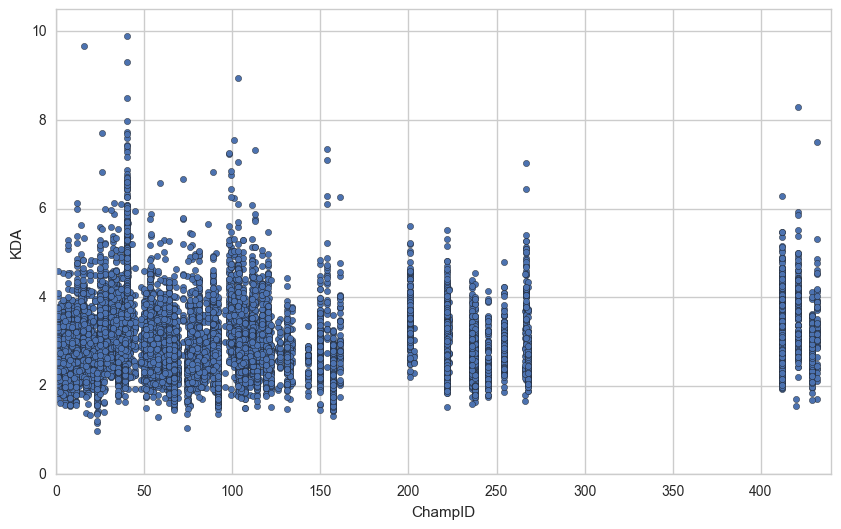

In [37]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['KDA'])
plt.xlabel('ChampID')
plt.ylabel('KDA')
plt.xlim(0, 440)
plt.ylim(0, 10.5)
plt.show()

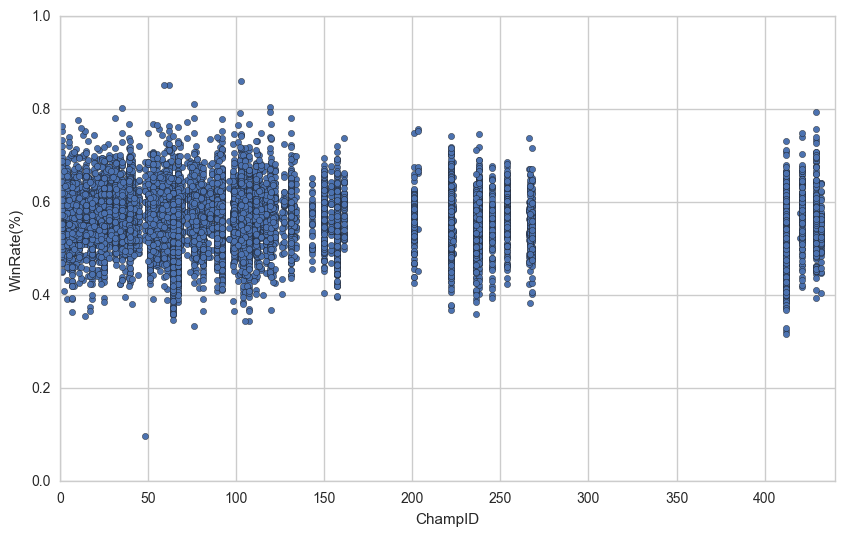

In [38]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['WinRate'])
plt.xlabel('ChampID')
plt.ylabel('WinRate(%)')
plt.xlim(0, 440)
plt.ylim(0, 1)
plt.show()

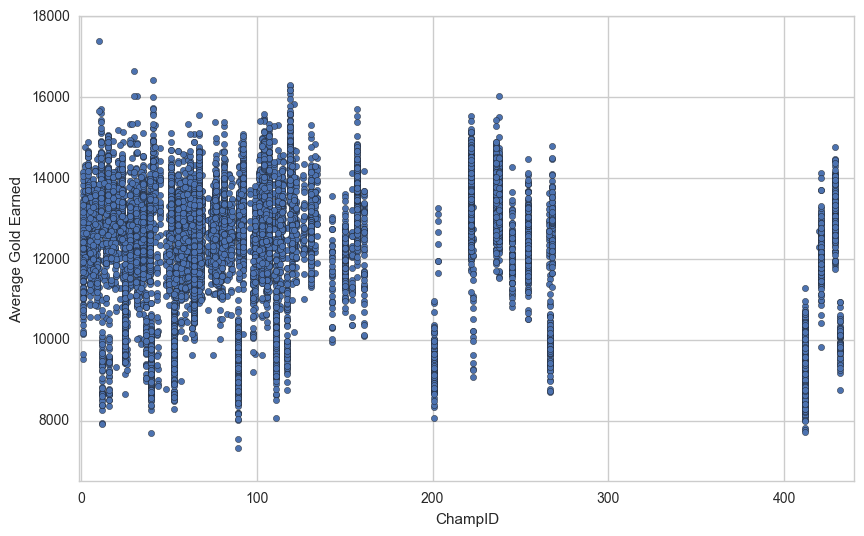

In [39]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['GoldEarned'])
plt.xlabel('ChampID')
plt.ylabel('Average Gold Earned')
plt.xlim(-1, 440)
plt.ylim(6500, 18000)
plt.show()

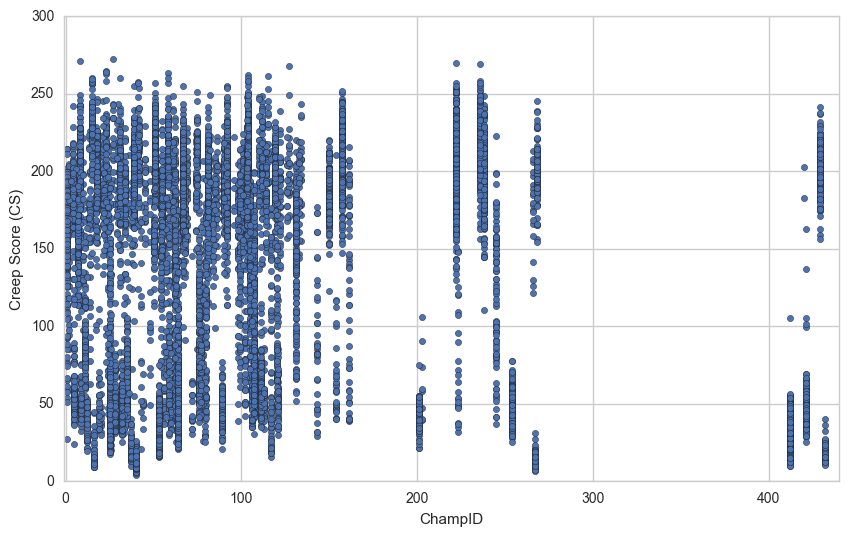

In [40]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['MinionKills'])
plt.xlabel('ChampID')
plt.ylabel('Creep Score (CS)')
plt.xlim(-1, 440)
plt.ylim(-0.05, 300)
plt.show()

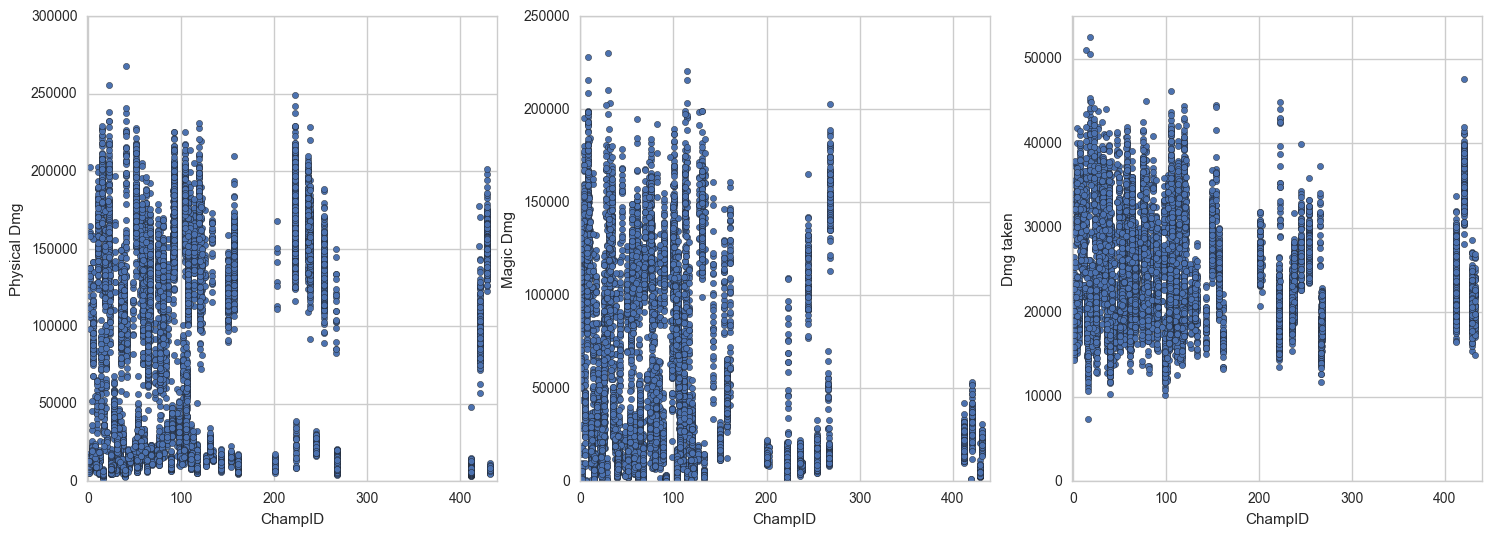

In [41]:
fig = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(df_pc['champID'], df_pc['PhysicalDamageDealt'])
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(df_pc['champID'], df_pc['MagicDamageDealt'])
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(df_pc['champID'], df_pc['DamageTaken'])
ax1.set_xlim([-1, 440])
ax1.set_ylim([0, 300000])
ax1.set_xlabel('ChampID')
ax1.set_ylabel('Physical Dmg')
ax2.set_xlim([-1, 440])
ax2.set_ylim([0, 250000])
ax2.set_xlabel('ChampID')
ax2.set_ylabel('Magic Dmg')
ax3.set_xlim([-1, 440])
ax3.set_ylim([0, 55000])
ax3.set_xlabel('ChampID')
ax3.set_ylabel('Dmg taken')
plt.show()

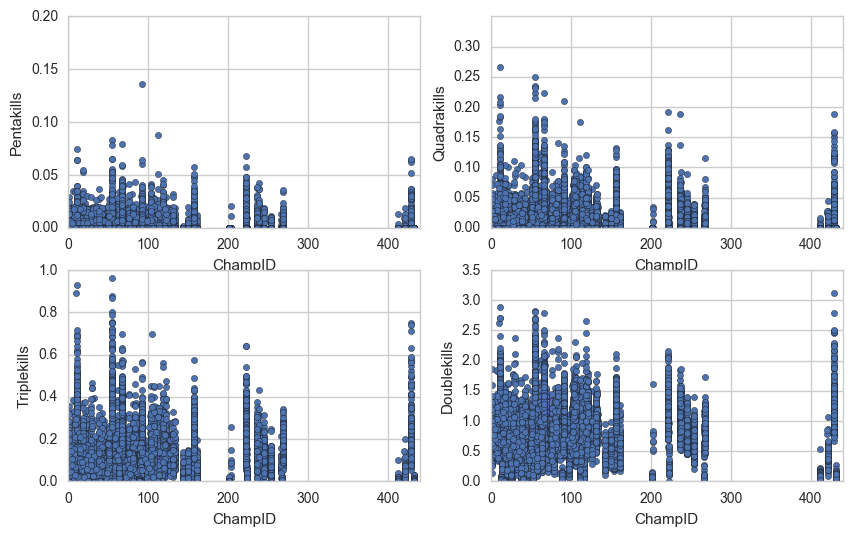

In [42]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df_pc['champID'], df_pc['PentaKills'])
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df_pc['champID'], df_pc['QuadraKills'])
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df_pc['champID'], df_pc['TripleKills'])
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(df_pc['champID'], df_pc['DoubleKills'])
ax1.set_xlim([-0.5, 440])
ax1.set_ylim([0, 0.2])
ax1.set_xlabel('ChampID')
ax1.set_ylabel('Pentakills')
ax2.set_xlim([-0.5, 440])
ax2.set_ylim([0, 0.35])
ax2.set_xlabel('ChampID')
ax2.set_ylabel('Quadrakills')
ax3.set_xlim([-0.5, 440])
ax3.set_ylim([0, 1])
ax3.set_xlabel('ChampID')
ax3.set_ylabel('Triplekills')
ax4.set_xlim([-0.5, 440])
ax4.set_ylim([0, 3.5])
ax4.set_xlabel('ChampID')
ax4.set_ylabel('Doublekills')
plt.show()

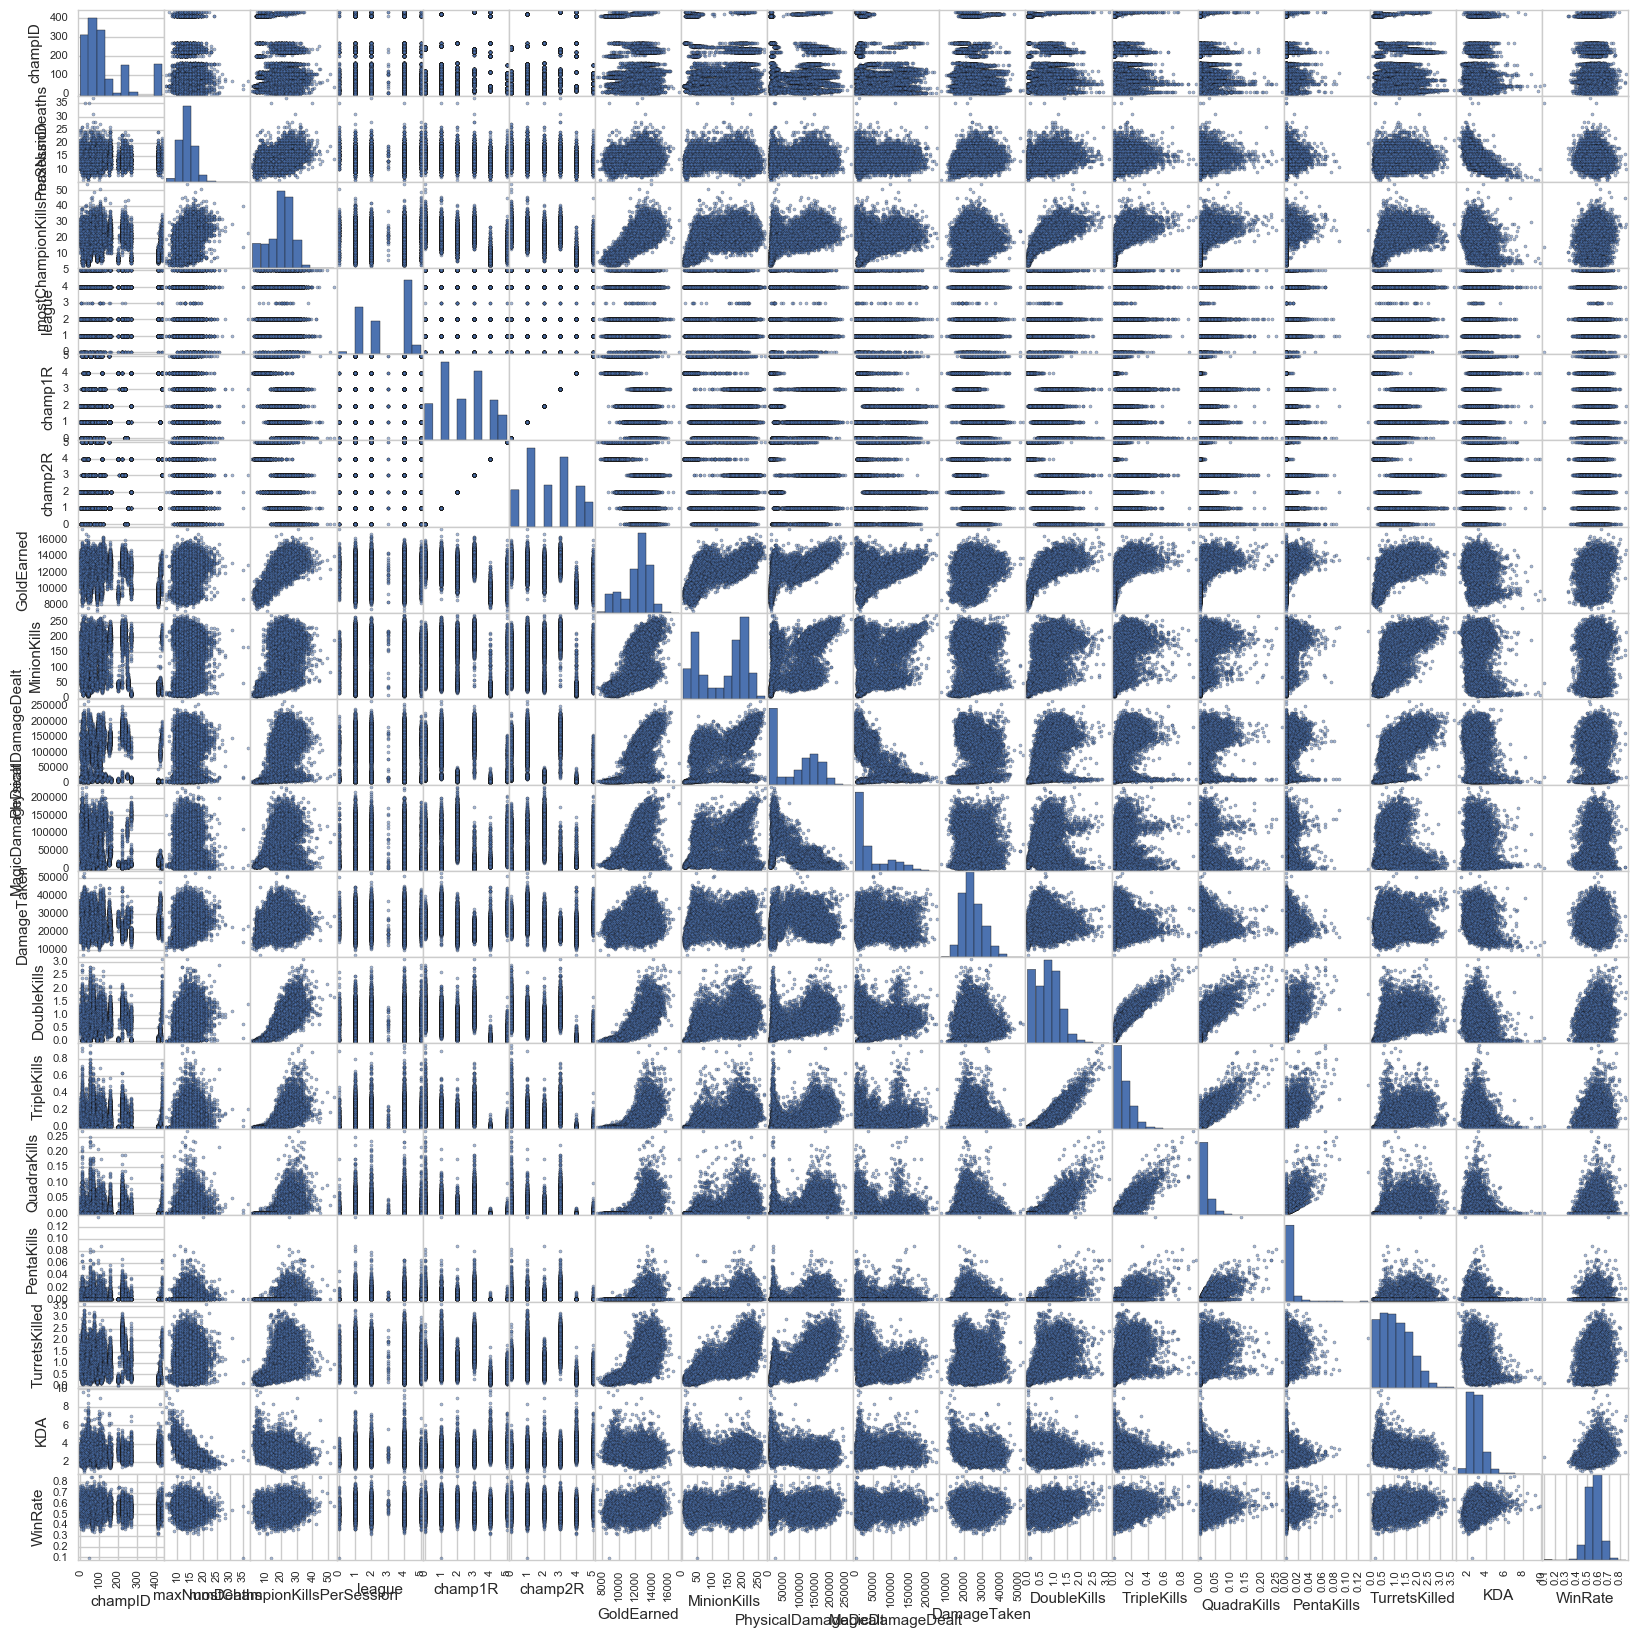

In [43]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_pc, figsize = (20,20))
plt.show()

## Data visualization by Tag1 

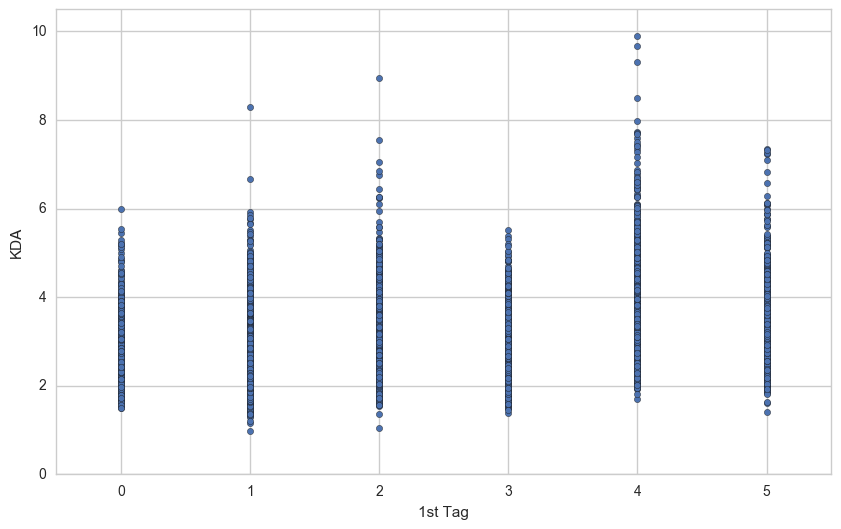

In [44]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champ1R'], df_pc['KDA'])
plt.xlabel('1st Tag')
plt.ylabel('KDA')
plt.xlim(-0.5, 5.5)
plt.ylim(0, 10.5)
plt.show()

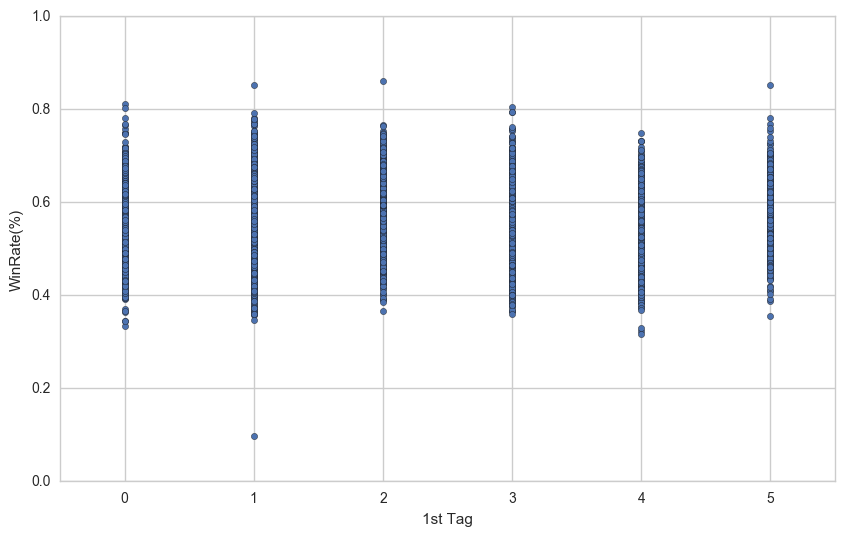

In [45]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champ1R'], df_pc['WinRate'])
plt.xlabel('1st Tag')
plt.ylabel('WinRate(%)')
plt.xlim(-0.5,5.5)
plt.ylim(0, 1)
plt.show()

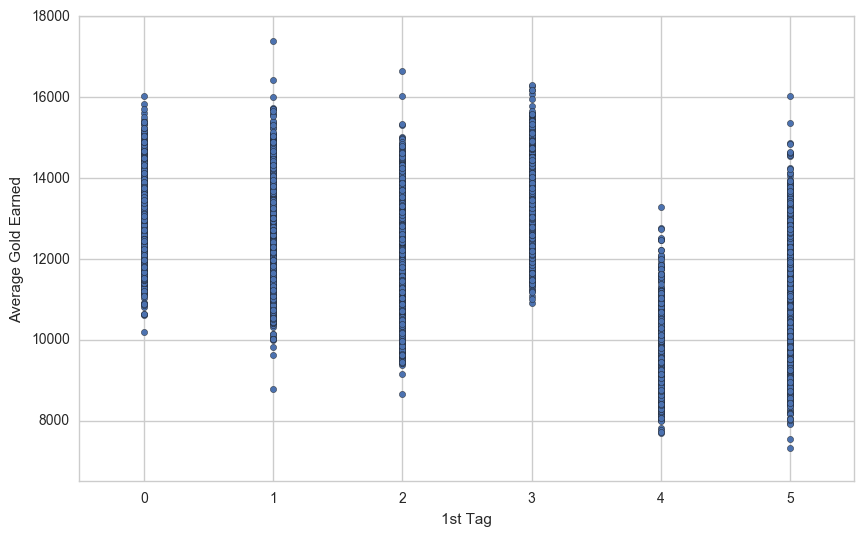

In [46]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champ1R'], df_pc['GoldEarned'])
plt.xlabel('1st Tag')
plt.ylabel('Average Gold Earned')
plt.xlim(-0.5,5.5)
plt.ylim(6500, 18000)
plt.show()

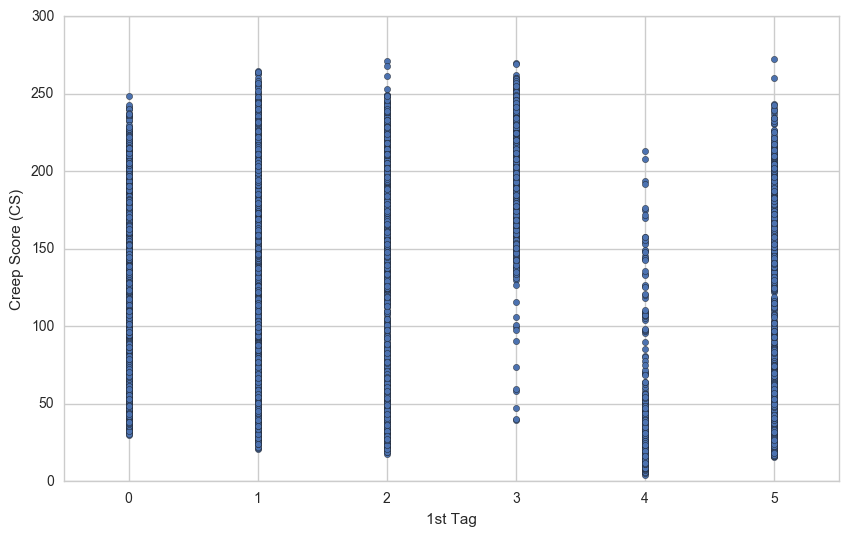

In [47]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champ1R'], df_pc['MinionKills'])
plt.xlabel('1st Tag')
plt.ylabel('Creep Score (CS)')
plt.xlim(-0.5, 5.5)
plt.ylim(-0.05, 300)
plt.show()

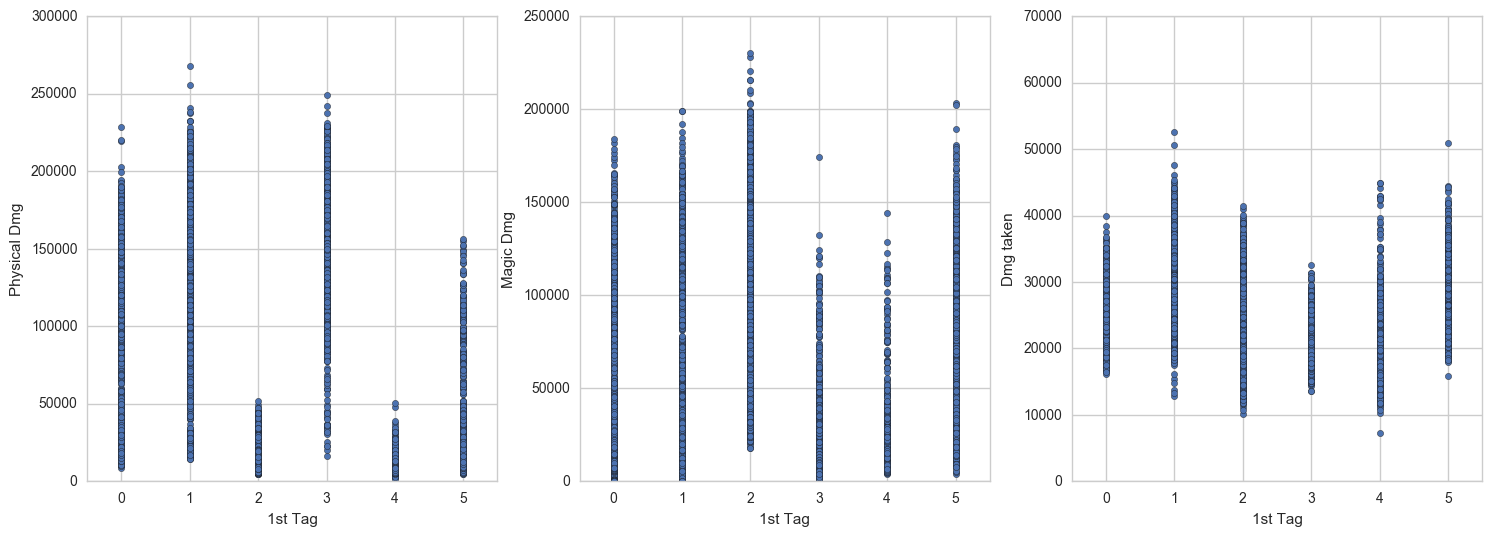

In [48]:
fig = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(df_pc['champ1R'], df_pc['PhysicalDamageDealt'])
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(df_pc['champ1R'], df_pc['MagicDamageDealt'])
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(df_pc['champ1R'], df_pc['DamageTaken'])
ax1.set_xlim([-0.5, 5.5])
ax1.set_ylim([0, 300000])
ax1.set_xlabel('1st Tag')
ax1.set_ylabel('Physical Dmg')
ax2.set_xlim([-0.5, 5.5])
ax2.set_ylim([0, 250000])
ax2.set_xlabel('1st Tag')
ax2.set_ylabel('Magic Dmg')
ax3.set_xlim([-0.5, 5.5])
ax3.set_ylim([0, 70000])
ax3.set_xlabel('1st Tag')
ax3.set_ylabel('Dmg taken')
plt.show()

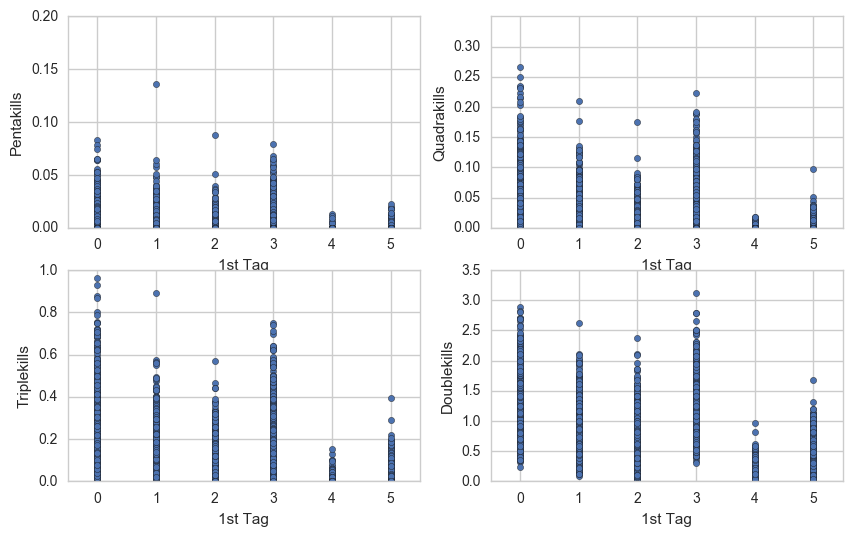

In [ ]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df_pc['champ1R'], df_pc['PentaKills'])
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df_pc['champ1R'], df_pc['QuadraKills'])
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df_pc['champ1R'], df_pc['TripleKills'])
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(df_pc['champ1R'], df_pc['DoubleKills'])
ax1.set_xlim([-0.5, 5.5])
ax1.set_ylim([0, 0.2])
ax1.set_xlabel('1st Tag')
ax1.set_ylabel('Pentakills')
ax2.set_xlim([-0.5, 5.5])
ax2.set_ylim([0, 0.35])
ax2.set_xlabel('1st Tag')
ax2.set_ylabel('Quadrakills')
ax3.set_xlim([-0.5, 5.5])
ax3.set_ylim([0, 1])
ax3.set_xlabel('1st Tag')
ax3.set_ylabel('Triplekills')
ax4.set_xlim([-0.5, 5.5])
ax4.set_ylim([0, 3.5])
ax4.set_xlabel('1st Tag')
ax4.set_ylabel('Doublekills')
plt.show()

## Data visualization by player (all champions played)

In [ ]:
scatter_matrix(df_total, figsize = (20,20))
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['league'], df_pc['KDA'])
plt.xlabel('league')
plt.ylabel('KDA')
plt.xlim(-0.5, 5.5)
plt.ylim(0, 10.5)
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['league'], df_pc['WinRate'])
plt.xlabel('League')
plt.ylabel('WinRate(%)')
plt.xlim(-0.5,5.5)
plt.ylim(0, 1)
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['league'], df_pc['GoldEarned'])
plt.xlabel('league')
plt.ylabel('Average Gold Earned')
plt.xlim(-0.5,5.5)
plt.ylim(6500, 18000)
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['league'], df_pc['MinionKills'])
plt.xlabel('league')
plt.ylabel('Creep Score (CS)')
plt.xlim(-0.5, 5.5)
plt.ylim(-0.05, 300)
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(df_pc['league'], df_pc['PhysicalDamageDealt'])
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(df_pc['league'], df_pc['MagicDamageDealt'])
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(df_pc['league'], df_pc['DamageTaken'])
ax1.set_xlim([-0.5, 5.5])
ax1.set_ylim([0, 300000])
ax1.set_xlabel('League')
ax1.set_ylabel('Physical Dmg')
ax2.set_xlim([-0.5, 5.5])
ax2.set_ylim([0, 250000])
ax2.set_xlabel('League')
ax2.set_ylabel('Magic Dmg')
ax3.set_xlim([-0.5, 5.5])
ax3.set_ylim([0, 70000])
ax3.set_xlabel('League')
ax3.set_ylabel('Dmg taken')
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df_pc['league'], df_pc['PentaKills'])
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df_pc['league'], df_pc['QuadraKills'])
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df_pc['league'], df_pc['TripleKills'])
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(df_pc['league'], df_pc['DoubleKills'])
ax1.set_xlim([-0.5, 5.5])
ax1.set_ylim([0, 0.2])
ax1.set_xlabel('League')
ax1.set_ylabel('Pentakills')
ax2.set_xlim([-0.5, 5.5])
ax2.set_ylim([0, 0.35])
ax2.set_xlabel('League')
ax2.set_ylabel('Quadrakills')
ax3.set_xlim([-0.5, 5.5])
ax3.set_ylim([0, 1])
ax3.set_xlabel('League')
ax3.set_ylabel('Triplekills')
ax4.set_xlim([-0.5, 5.5])
ax4.set_ylim([0, 3.5])
ax4.set_xlabel('League')
ax4.set_ylabel('Doublekills')
plt.show()

## Export the processed data

In [ ]:
df_pc.to_pickle('pc_processed.pkl')

In [ ]:
df_total.to_pickle('total_processed.pkl')